In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df = application_df.drop(columns="NAME")
application_df = application_df.drop(columns="EIN")
application_df = application_df.drop(columns="USE_CASE")

In [3]:
affiliation_counts = application_df.AFFILIATION.value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

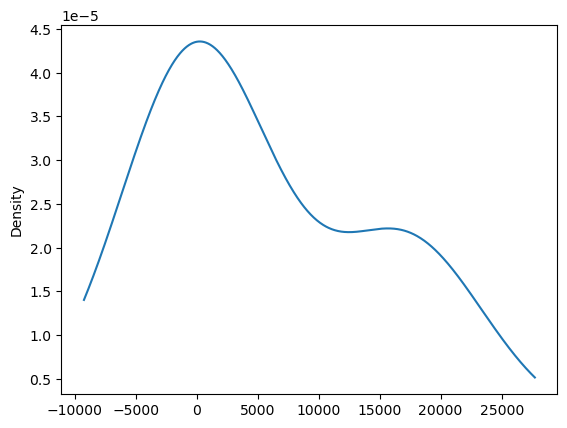

In [4]:
affiliation_counts.plot.density()

In [5]:
replace_affiliation = list(affiliation_counts[affiliation_counts<15000].index)
for app in replace_affiliation:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(app,"Other")
    
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts<5000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
Other    10899
C2000     6074
Name: CLASSIFICATION, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts<10000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes=="object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\DrDan\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C2000,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Co-operative,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\DrDan\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C2000,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns= ["IS_SUCCESSFUL"]).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=35)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2=25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                780       
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,581
Trainable params: 1,581
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/", exist_ok=True)
checkpoint = "checkpoints/weights.{epoch:02d}.hdf5"

callback=ModelCheckpoint(filepath=checkpoint,save_weights_only=True, save_freq=5)

fit_model = nn.fit(X_train_scaled,y_train, epochs=100, callbacks=[callback])

Epoch 1/100
804/804 [==============================] - 8s 9ms/step - loss: 0.6086 - accuracy: 0.6873
Epoch 2/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5923 - accuracy: 0.7014
Epoch 3/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5914 - accuracy: 0.7019
Epoch 4/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5904 - accuracy: 0.7025
Epoch 5/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5895 - accuracy: 0.7035
Epoch 6/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5890 - accuracy: 0.7020
Epoch 7/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5889 - accuracy: 0.7039
Epoch 8/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5883 - accuracy: 0.7044
Epoch 9/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5884 - accuracy: 0.7018
Epoch 10/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5881 - accu

804/804 [==============================] - 8s 10ms/step - loss: 0.5838 - accuracy: 0.7067
Epoch 81/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5842 - accuracy: 0.7073
Epoch 82/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5837 - accuracy: 0.7067
Epoch 83/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5835 - accuracy: 0.7074
Epoch 84/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5837 - accuracy: 0.7076
Epoch 85/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5838 - accuracy: 0.7073
Epoch 86/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5837 - accuracy: 0.7074
Epoch 87/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5838 - accuracy: 0.7067
Epoch 88/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5837 - accuracy: 0.7070
Epoch 89/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5836 - a

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5884 - accuracy: 0.7083 - 1s/epoch - 5ms/step
Loss: 0.5883533954620361, Accuracy: 0.70833820104599


In [20]:
# Save model as HDF5 File
nn.save("AlphabetSoupCharity_Optimization.h5")